In [107]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.datasets import make_blobs, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
sns.set_style('whitegrid')
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [101]:
train = pd.read_csv("train2.tsv",sep='\t')
sample=pd.read_csv("sample_submit.csv",header=None)
X = train.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14]]
X[X.isnull().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country


In [3]:
X=X.replace({'?':pd.np.nan})

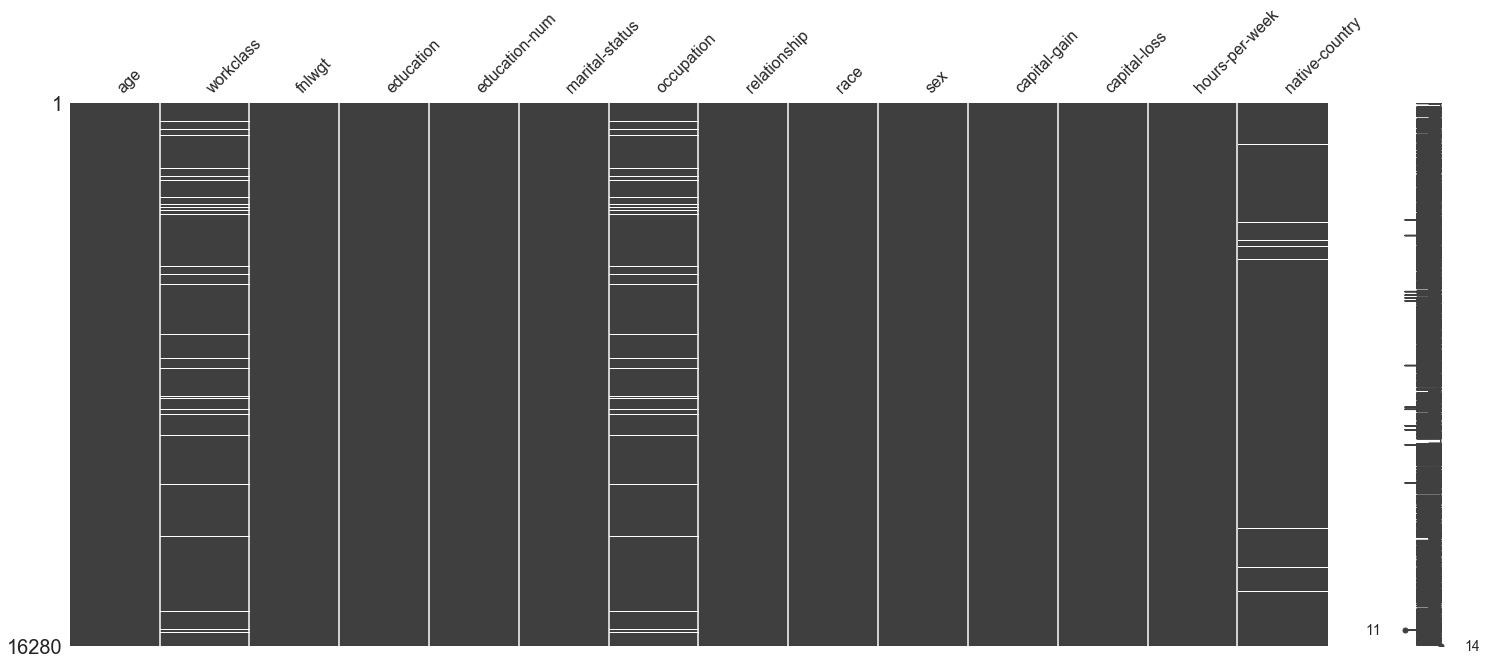

In [4]:
msno.matrix(X)

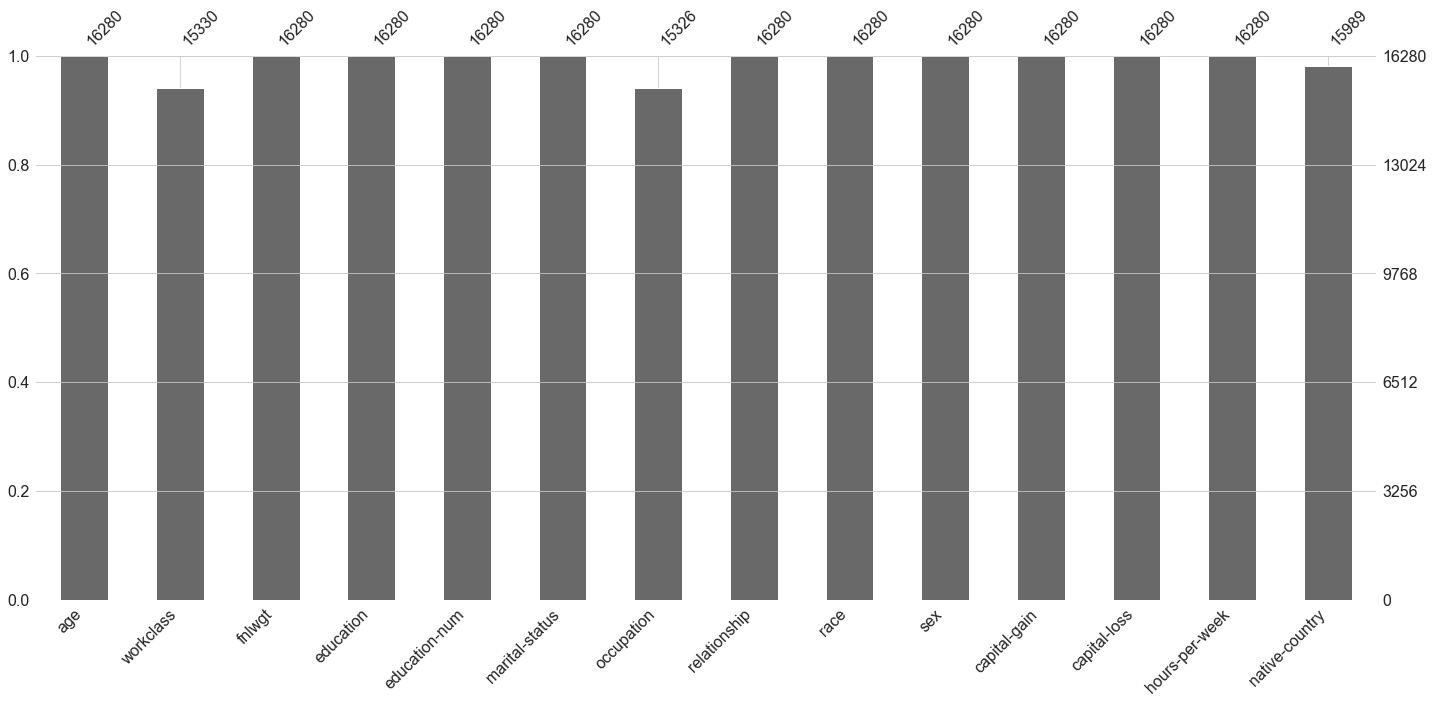

In [5]:
msno.bar(X)

In [6]:
X.isnull().sum()

age                 0
workclass         950
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        954
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    291
dtype: int64

In [7]:
import collections

work = collections.Counter(train.iloc[:,2])
print(work.most_common())
print(occ.most_common())
nat = collections.Counter(train.iloc[:,14])
occ = collections.Counter(train.iloc[:,7])
print(nat.most_common())

[('Private', 11281), ('Self-emp-not-inc', 1281), ('Local-gov', 1033), ('?', 950), ('State-gov', 653), ('Self-emp-inc', 560), ('Federal-gov', 512), ('Without-pay', 6), ('Never-worked', 4)]
[('Prof-specialty', 2055), ('Craft-repair', 2051), ('Exec-managerial', 2034), ('Adm-clerical', 1954), ('Sales', 1831), ('Other-service', 1634), ('Machine-op-inspct', 965), ('?', 954), ('Transport-moving', 759), ('Handlers-cleaners', 673), ('Farming-fishing', 504), ('Tech-support', 455), ('Protective-serv', 333), ('Priv-house-serv', 75), ('Armed-Forces', 3)]
[('United-States', 14556), ('Mexico', 332), ('?', 291), ('Philippines', 108), ('Germany', 68), ('Canada', 60), ('Puerto-Rico', 59), ('India', 57), ('Cuba', 51), ('El-Salvador', 49), ('South', 42), ('Jamaica', 40), ('China', 38), ('Columbia', 35), ('Japan', 35), ('Dominican-Republic', 34), ('Italy', 34), ('England', 32), ('Vietnam', 31), ('Taiwan', 30), ('Poland', 30), ('Guatemala', 25), ('Nicaragua', 23), ('Iran', 21), ('Ecuador', 19), ('Peru', 18)

In [8]:
# One-Hot encoding
X = train.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
X = pd.get_dummies(X)
Y_mapping={'<=50K':0,'>50K':1}
train['Y']=train['Y'].map(Y_mapping)
train.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
0,5,90,Private,313986,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,0
1,10,46,Private,74895,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1485,55,United-States,0
2,11,37,Private,67433,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,1
3,13,45,Local-gov,144940,Masters,14,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,0
4,14,40,Private,272960,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,42,United-States,1


In [9]:
y = train.iloc[:,15]
X = train.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14]]
X = pd.get_dummies(X)

In [80]:
X.shape

(16280, 14)

In [11]:
X.dtypes

fnlwgt                                       int64
education-num                                int64
capital-gain                                 int64
capital-loss                                 int64
hours-per-week                               int64
workclass_?                                  uint8
workclass_Federal-gov                        uint8
workclass_Local-gov                          uint8
workclass_Never-worked                       uint8
workclass_Private                            uint8
workclass_Self-emp-inc                       uint8
workclass_Self-emp-not-inc                   uint8
workclass_State-gov                          uint8
workclass_Without-pay                        uint8
education_10th                               uint8
education_11th                               uint8
education_12th                               uint8
education_1st-4th                            uint8
education_5th-6th                            uint8
education_7th-8th              

In [12]:
X=X.drop('workclass_?',axis=1)
X.head()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,313986,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,74895,12,0,1485,55,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,67433,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,144940,14,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,272960,12,0,0,42,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


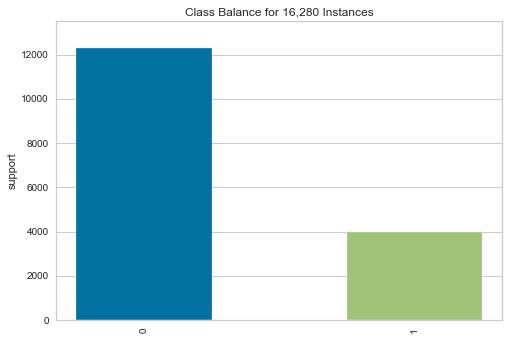

In [13]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()
visualizer.fit(y)
plt.xticks(rotation=90)
visualizer.poof()

In [14]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_sample(X, y)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


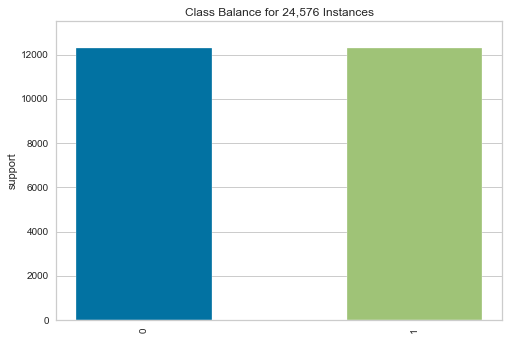

In [15]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance()
visualizer.fit(y)
plt.xticks(rotation=90)
visualizer.poof()

## Learning

In [16]:
X = np.array(X)
y = np.array(y)

# scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    shuffle=True, random_state=42)

In [18]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)                 
y_pred = knn.predict(X_test) 

In [19]:
metrics.accuracy_score(y_test, y_pred)

0.8660360085444003

In [20]:
accuracy = []
for k in range(1, 250):
    knn = KNeighborsClassifier(n_neighbors=k) # インスタンス生成。
    knn.fit(X_train, y_train)                 # モデル作成実行
    y_pred = knn.predict(X_test)              # 予測実行
    accuracy.append(metrics.accuracy_score(y_test, y_pred)) # 精度格納

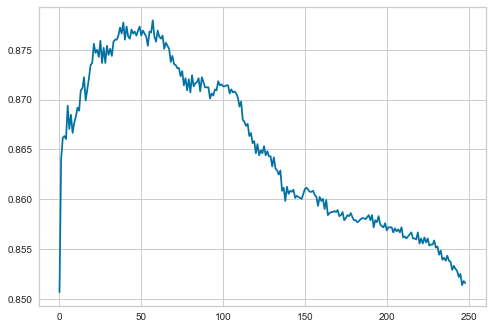

In [21]:
plt.plot(accuracy)

In [102]:
test2 = pd.read_csv("test2.tsv",sep='\t')
test2.shape
X_test = test2.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14]]
y_test = train.iloc[:,15]
X_train = train.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14]]
X_train = pd.get_dummies(X_train)
X_train.shape
X_test = pd.get_dummies(X_test)
X_test.shape

(16281, 108)

In [103]:
sample_mapping={'<=50K':0,'>50K':1}
sample[1]=sample[1].map(sample_mapping)
S = sample.iloc[:,1]
S.head()

0    1
1    1
2    0
3    1
4    0
Name: 1, dtype: int64

In [104]:
S.shape

(16281,)

In [106]:
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, S)                 

ValueError: Found input variables with inconsistent numbers of samples: [16280, 16281]

In [92]:
y_pred=knn.predict(X_train)

In [93]:
acc = accuracy_score(S, y_pred)
print('Accuracy =', acc)

Accuracy = 0.5572139303482587


In [94]:
y_pred.shape

(16281,)

In [43]:
sample.to_csv("tax_submit_k-nn.csv", header = None, index = None)